# Calculatorium Interactum Dashboard

Welcome to your personal dashboard for tracking your progress through the Calculatorium Interactum course. Here you can view your scores, completed lessons, and reset your progress if needed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from db_utils import get_progress, reset_progress, get_courses_and_lessons
from ipywidgets import widgets
from IPython.display import display, clear_output

# Assume user_id 1 for now. In a real app, you'd get this from authentication.
user_id = 1

## Your Progress

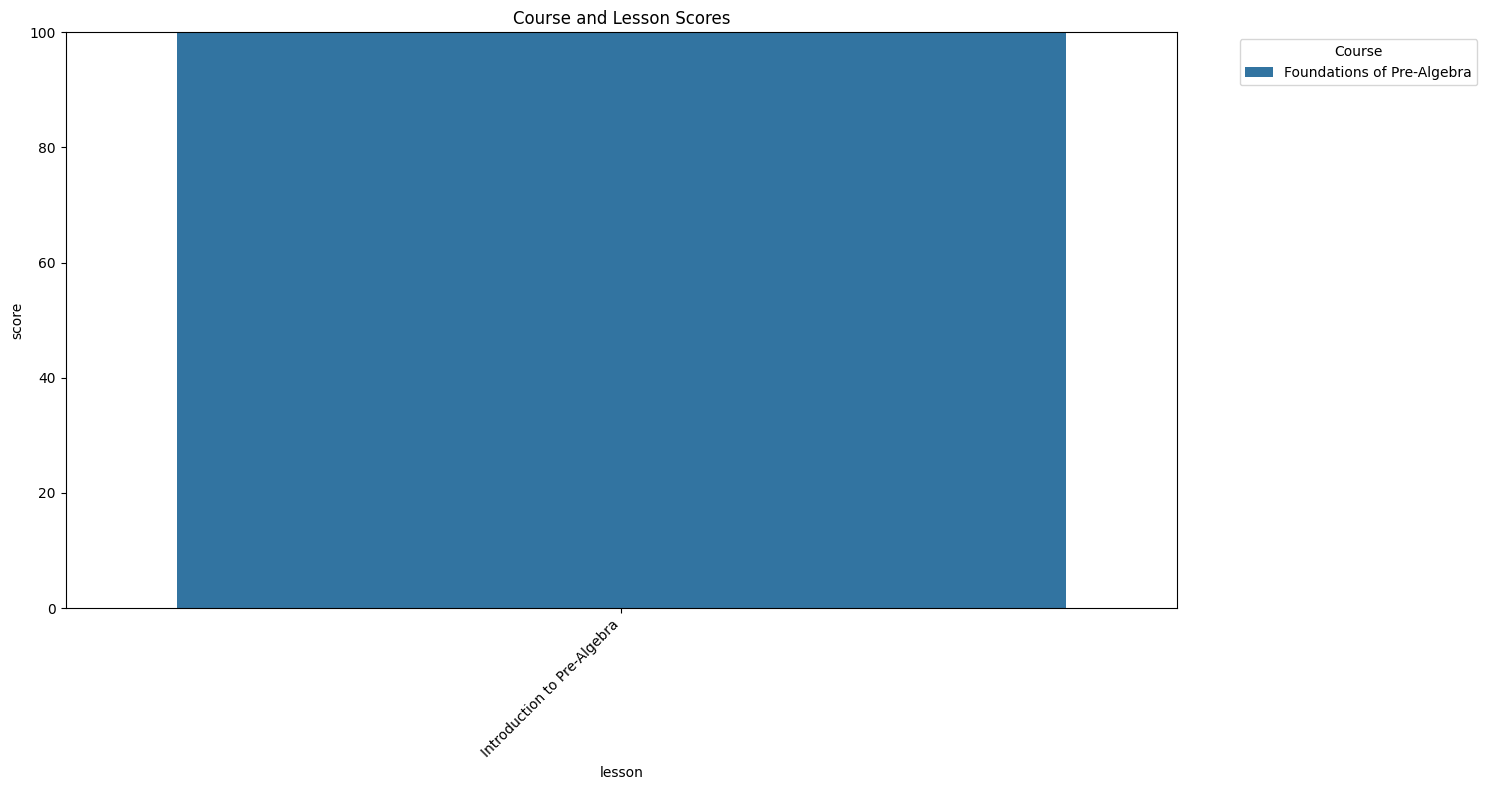

Completed lessons: 1/1


In [2]:
def plot_progress():
    progress = get_progress(user_id)
    if progress.empty:
        print("No progress data available. Complete some lessons to see your progress!")
        return
    
    plt.figure(figsize=(15, 8))
    sns.barplot(x='lesson', y='score', hue='course', data=progress)
    plt.title('Course and Lesson Scores')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Course', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    completed = progress['completed'].sum()
    total = len(progress)
    print(f"Completed lessons: {completed}/{total}")

plot_progress()

## Reset Progress

If you want to start over or reset your progress for specific courses or lessons, you can do so here. Be careful, as this action cannot be undone!

In [3]:
def on_reset_click(b):
    selected_courses = [course for course, checkbox in course_checkboxes.items() if checkbox.value]
    selected_lessons = [lesson for lesson, checkbox in lesson_checkboxes.items() if checkbox.value]
    
    if selected_courses or selected_lessons:
        reset_progress(user_id, courses=selected_courses, lessons=selected_lessons)
        reset_message = []
        if selected_courses:
            reset_message.append(f"Courses: {', '.join(selected_courses)}")
        if selected_lessons:
            reset_message.append(f"Lessons: {', '.join(selected_lessons)}")
        print(f"Progress reset for {' and '.join(reset_message)}")
    else:
        reset_progress(user_id)
        print("All progress reset.")
    
    clear_output(wait=True)
    plot_progress()
    display_reset_options()

def display_reset_options():
    global course_checkboxes, lesson_checkboxes
    course_checkboxes = {}
    lesson_checkboxes = {}
    courses_lessons = get_courses_and_lessons(user_id)
    
    if not courses_lessons:
        print("No courses or lessons available. Complete some lessons to see reset options.")
        return
    
    print("Select courses or lessons to reset (leave all unchecked to reset all):")
    
    for course, lessons in courses_lessons.items():
        course_checkbox = widgets.Checkbox(value=False, description=f"Course: {course}")
        course_checkboxes[course] = course_checkbox
        display(course_checkbox)
        
        for lesson in lessons:
            lesson_checkbox = widgets.Checkbox(value=False, description=f"  Lesson: {lesson}")
            lesson_checkboxes[lesson] = lesson_checkbox
            display(lesson_checkbox)
    
    reset_button = widgets.Button(description="Reset Selected Progress")
    reset_button.on_click(on_reset_click)
    display(reset_button)

display_reset_options()

Select courses or lessons to reset (leave all unchecked to reset all):


Checkbox(value=False, description='Course: Foundations of Pre-Algebra')

Checkbox(value=False, description='  Lesson: Introduction to Pre-Algebra')

Button(description='Reset Selected Progress', style=ButtonStyle())

## Next Steps

Based on your current progress, here are some suggested next steps:

In [4]:
def suggest_next_steps():
    progress = get_progress(user_id)
    if progress.empty:
        print("1. Start with the first lesson in 'Foundations of Pre-Algebra'.")
        return
    
    # Find lessons with scores below 80%
    review_lessons = progress[progress['score'] < 80]
    if not review_lessons.empty:
        print("1. Review these lessons where your score is below 80%:")
        for _, lesson in review_lessons.iterrows():
            print(f"   - {lesson['course']}: {lesson['lesson']} (Score: {lesson['score']}%)")
    
    # Suggest the next incomplete lesson
    incomplete_lessons = progress[progress['completed'] == 0]
    if not incomplete_lessons.empty:
        next_lesson = incomplete_lessons.iloc[0]
        print(f"2. Continue with the next lesson: {next_lesson['course']} - {next_lesson['lesson']}")
    else:
        print("2. Great job! You've completed all available lessons.")
    
    print("3. Remember, consistent practice is key to mastering mathematics. Keep up the great work!")

suggest_next_steps()

2. Great job! You've completed all available lessons.
3. Remember, consistent practice is key to mastering mathematics. Keep up the great work!
